In [2]:
#Importing necessary Libraries
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [3]:
 data = pd.read_csv('C:\\Users\\ccuti\\Data Science\\Project\\Insurance Claim Prediction\\data\\train.csv')

In [4]:
#check the data heads are proided
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the missing values are represent by -1 so we convert them with NaN

In [6]:
data = data.replace(to_replace = -1, value = np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  float64
 6   ps_ind_05_cat   589403 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [7]:
#checking for missing values
data.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


Through this we can see that these feature have a lot of missing values <br>
FEATURE <br>
ps_car_03_cat   411231 <br>
ps_reg_03       107772 <br>
ps_car_05_cat     266551 <br>
ps_car_14           42620 <br>
ps_car_07_cat      11489 <br>

Dropping all the features with highest missing values<br>
For rest for the missing values we will be replacing it with mean and the mode<br>
binary data is represented by bin (mode)<br>
categorical data is represented by cat (mode)<br>
rest are the cordinal and ordinal data (mean)


In [8]:
data.drop(["ps_car_03_cat", "ps_reg_03", "ps_car_05_cat", "ps_car_14", "ps_car_07_cat"], axis =1, inplace =True)


In [9]:
# replace missing data in the remaining features
feature_bin = [f for f in data.columns if f.endswith('bin')] 
feature_cat = [f for f in data.columns if f.endswith('cat')] 
feature_els = [f for f in data.columns if (f not in feature_bin) & (f not in feature_cat) & (f not in ['id', 'target'])]

for f in (feature_bin + feature_cat):
    data[f].fillna(value=data[f].mode()[0], inplace=True)
for f in feature_els:
    data[f].fillna(value=data[f].mean(), inplace=True)

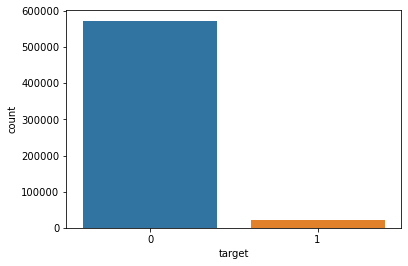

In [12]:
sns.countplot(data['target'])
plt.show()
# 1 is the number of people who have claimed the insurance and its less than 100000


we can see that "calc" shows a little correlation than rest of the data.<br>
Now we will try to visualize the distribution of binary and categorical data.<br>

<AxesSubplot:title={'center':'Pearson correlation of bin features'}>

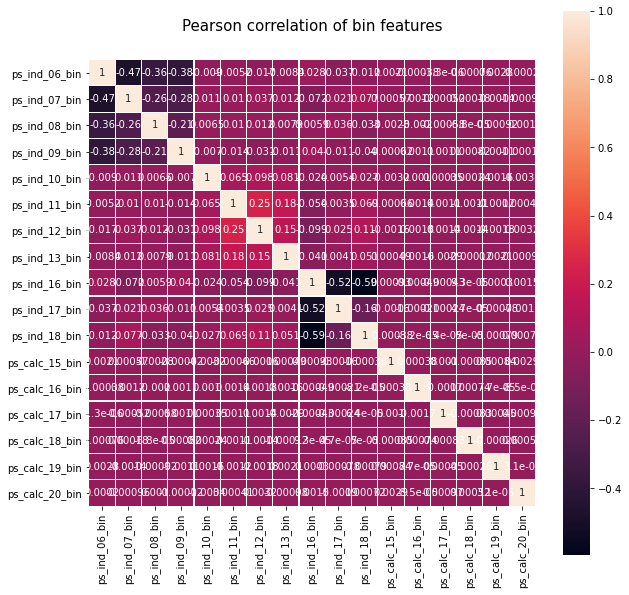

In [13]:
plt.figure(figsize=(10,10))
plt.title('Pearson correlation of bin features', y=1.05, size=15)
sns.heatmap(data[feature_bin].corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            linecolor='white', 
            annot=True)

<AxesSubplot:title={'center':'Pearson correlation of cat features'}>

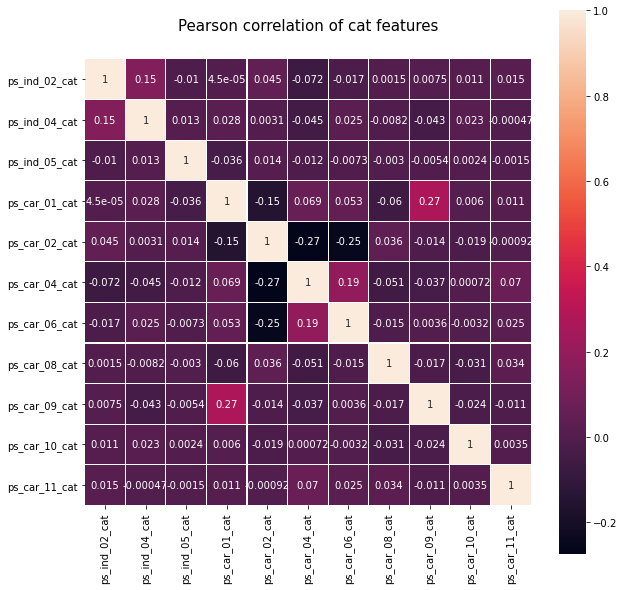

In [14]:
plt.figure(figsize=(10,10))
plt.title('Pearson correlation of cat features', y=1.05, size=15)
sns.heatmap(data[feature_cat].corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            linecolor='white', 
            annot=True)

Converting Categorical Data into numerical data using One Hot Encoding

In [10]:
features_cat = [c for c in data if 'cat' in c]
for f in features_cat:
    le = LabelEncoder()
    le.fit(data[f])
    data[f] = le.fit_transform(data[f])
   

In [11]:
#fixing the outliers with inter quartile calculation
def outlier(data,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
outlier

<function __main__.outlier(data, columns)>

In [14]:
X = data.drop(['target','id'],axis=1)
y = data['target'].astype('category')

In [15]:
#spiltting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 2020)

In [16]:
#importing and fitting the model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 2000, max_depth=6,min_samples_split=70,min_samples_leaf=30)
classifier.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=30,
                       min_samples_split=70, random_state=2000)

In [17]:
### FITTING RANDOM MODEL 
classifier.fit(x_train, y_train)

#Obtain class predictions
y_pred = classifier.predict_proba(x_test)
print('Predicted probabilities: \n', y_pred)

#Obtain probability predictions
y_pred = classifier.predict(x_test)
print('Predicted classes: \n', y_pred)

print('RF Score: ', metrics.accuracy_score(y_test, y_pred))

## CONFUSION MATRIX
RF_cm=metrics.confusion_matrix(y_test,y_pred)
print(RF_cm)


Predicted probabilities: 
 [[0.97906602 0.02093398]
 [0.98364387 0.01635613]
 [0.96678034 0.03321966]
 ...
 [0.97588232 0.02411768]
 [0.97142504 0.02857496]
 [0.94941012 0.05058988]]
Predicted classes: 
 [0 0 0 ... 0 0 0]
RF Score:  0.962652150903455
[[114597      0]
 [  4446      0]]


In [18]:
# View accuracy score
accuracy_score(y_test, y_pred)


0.962652150903455

In [24]:
# View the classification report for test data and predictions
print(classification_report( y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114597
           1       0.00      0.00      0.00      4446

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043

